In [32]:
import pandas as pd
#Data Preparation

data = pd.read_csv('pixel 7 Pro.csv')
data.head()

,Page,Title,Price,Sold Date,Link,Image Link
0,1,Google Pixel 7a | 7 | 7 Pro - 128GB 256GB 512G...,$194.95,"Sold Oct 21, 2025",https://www.ebay.com/itm/186577116952,https://i.ebayimg.com/images/g/SMoAAOSw9NZmmrF...
1,1,Google Pixel 6 - 6 Pro - 128/256 GB - Unlocked...,$154.99,"Sold Oct 21, 2025",https://www.ebay.com/itm/175221332529,https://i.ebayimg.com/images/g/2-sAAOSwl1diRJt...
2,1,Google Pixel 7 | 7a | 7 Pro - 128GB 256GB 512G...,$179.95,"Sold Oct 20, 2025",https://www.ebay.com/itm/276557533467,https://i.ebayimg.com/images/g/haoAAOSw605mkYO...
3,1,"Google Pixel 7 Pro 5G (128GB, 12GB) 6.7"" Fully...",$289.99,"Sold Aug 2, 2025",https://www.ebay.com/itm/134779506570,https://i.ebayimg.com/images/g/2cAAAeSwyYBoQf8...
4,1,Google Pixel 7 Pro Unlocked All Colors/Memory ...,$259.99,"Sold Oct 20, 2025",https://www.ebay.com/itm/126921454911,https://i.ebayimg.com/images/g/c6oAAOSwz-xnopd...


In [33]:
data['Date'] = data['Sold Date'].apply(lambda x: x.replace('Sold ', ''))

In [51]:
data['Title'].apply(lambda x: x.count('|')).value_counts()

# Get ram based on GB suffix
data['Storage'] = data['Title'].apply(lambda x: x[x.find('GB')-3:x.find('GB')].strip() if 'GB' in x else 'Unknown')

#Get the condition based on the first part of the title
def extract_condition(title):
    if 'Excellent' in title:
        return 'Excellent'
    elif 'Very' in title:
        return 'Very Good'
    elif 'Good' in title:
        return 'Good'
    else:
        return 'Unknown'

data['Condition'] = data['Title'].apply(extract_condition)
data['PartsOnly'] = data['Title'].apply(lambda x: 'Parts Only' in x)
data['7 Pro'] = (data['Title'].str.contains('7 Pro')) & (~data['Title'].str.contains('|'))

# Now show the relevant columns
data[['Storage', 'Title', 'Condition', 'PartsOnly', '7 Pro']]

data['7 Pro'].value_counts()



7 Pro
False    122
Name: count, dtype: int64

In [35]:
data['Date'] = pd.to_datetime(data['Date'])

In [36]:
data['Price'] = data['Price'].apply(lambda x: x.replace('$','').replace(',','')).astype(float)

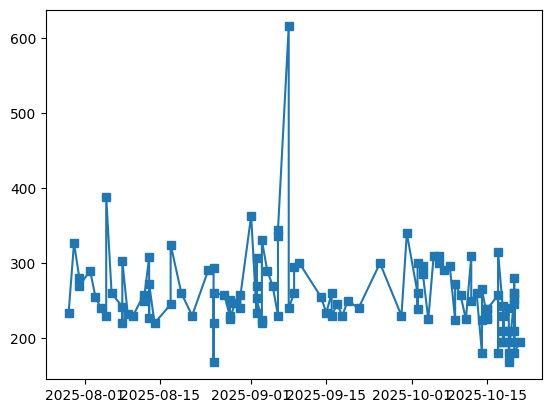

In [37]:
filtered = data.sort_values('Date')[10:]

import matplotlib 

from matplotlib import pyplot as plt

plt.plot(filtered['Date'], filtered['Price'], marker='s')

In [38]:
#Clean the data: Kepp only 7 Pro models and categoriesze it to 

#1. Good, Very Good , Excellent Refurbished 
#2. Storage 
#3. Date Sold

In [39]:
#Multiple Regression 

# Price = β0 + β1(Storage) + β2(Condition) + β3(Date Sold) + ε
